# Plotting
  
PBjam has some built in methods for plotting the results. These can be called from both the `modeID` or `peakbag` class, and most contain an option to plot either models drawn from the posterior or prior. The latter is useful for diagnosing issues with the fit, to see if the prior is causing problems.

In the case of the `modeID` class most of these plotting methods can also be used at either the $\ell=2,0$ or $\ell=1$ stages, and are updated with the most recent mode solutions. 

The methods are:
- `spectrum`: plots the spectrum of the model. For the mode ID stage this will show both the full spectrum, a zoom on the envelope and various residual plots.
- `echelle`: creates an echelle diagram. 
- `corner`: creates a corner plot of the samples. Selecting unpacked=True, will transform the results to linear scale etc. 
- `reference`: plot the result of the mode ID in relation to the prior that was drawn. This is useful for diagnosing problems with the mode ID.

**Note** Some of these plotting functions (particularly corner) can take a while to show, and take a fair amount of memory, so take care with them.

Let's start by initializing a star class and just doing the mode ID stage for now.

In [2]:
from pbjam import IO
from pbjam.core import star
 

psd = IO.psd('KIC10963065', lk_kwargs={'quarter': 6, 'exptime': 60, 'mission':'Kepler', 'author':'Kepler'}, numax=2000)

psd()

downSampling = 10

f = psd.freq[::downSampling]

s = psd.powerdensity[::downSampling]

obs = {'numax': (2204, 100), #muHz
       'dnu'  : (103.2, 0.54), #muHz
       'teff' : (6140, 77), #K
       'bp_rp': (0.70026, 0.05), #mag 
        }

N_p = 10

S = star('KIC10963065', f, s, obs, N_p=N_p, freqLimits=[10, 8000])

S.runModeID()

16055it [03:49, 70.06it/s, +600 | bound: 162 | nc: 1 | ncall: 466422 | eff(%):  3.575 | loglstar:   -inf < -4526.856 <    inf | logz: -4551.315 +/-  0.182 | dlogz:  0.000 >  0.100]


Input Teff=6140K and dnu=103.2muHz suggests the appropriate l=1 model is: ms


1054it [00:03, 268.54it/s, +150 | bound: 24 | nc: 1 | ncall: 17697 | eff(%):  6.862 | loglstar:   -inf < -5995.450 <    inf | logz: -6000.117 +/-  0.146 | dlogz:  0.001 >  0.100]
3823it [00:15, 254.54it/s, +150 | bound: 144 | nc: 1 | ncall: 81384 | eff(%):  4.891 | loglstar:   -inf < -5995.444 <    inf | logz: -6000.116 +/-  0.135 | dlogz:  0.000 >  0.000]


### The spectrum plots
A good way to see if the mode ID is correct is to just plot the models on top of the spectrum. The spectrum method shows three frames at the $\ell=2,0$ stage and four after the $\ell=1$ stage. The top being the full spectrum with the models overplotted (useful for inspecting the background fit), followed by a zoom on the envelope with first the $\ell=2,0$ model plotted, and then the residuals after each subsequent step to show how well the $\ell=1$ model is doing. Each frame shows a set of models computed from several samples drawn from the posterior distribution.

(<Figure size 1600x1800 with 4 Axes>,
 array([<Axes: ylabel='PSD [$\\mathrm{ppm}^2/\\mu \\rm Hz$]'>,
        <Axes: ylabel='PSD [$\\mathrm{ppm}^2/\\mu \\rm Hz$]'>,
        <Axes: ylabel='Residual'>,
        <Axes: xlabel='Frequency ($\\mu \\rm Hz$)', ylabel='Residual'>],
       dtype=object))

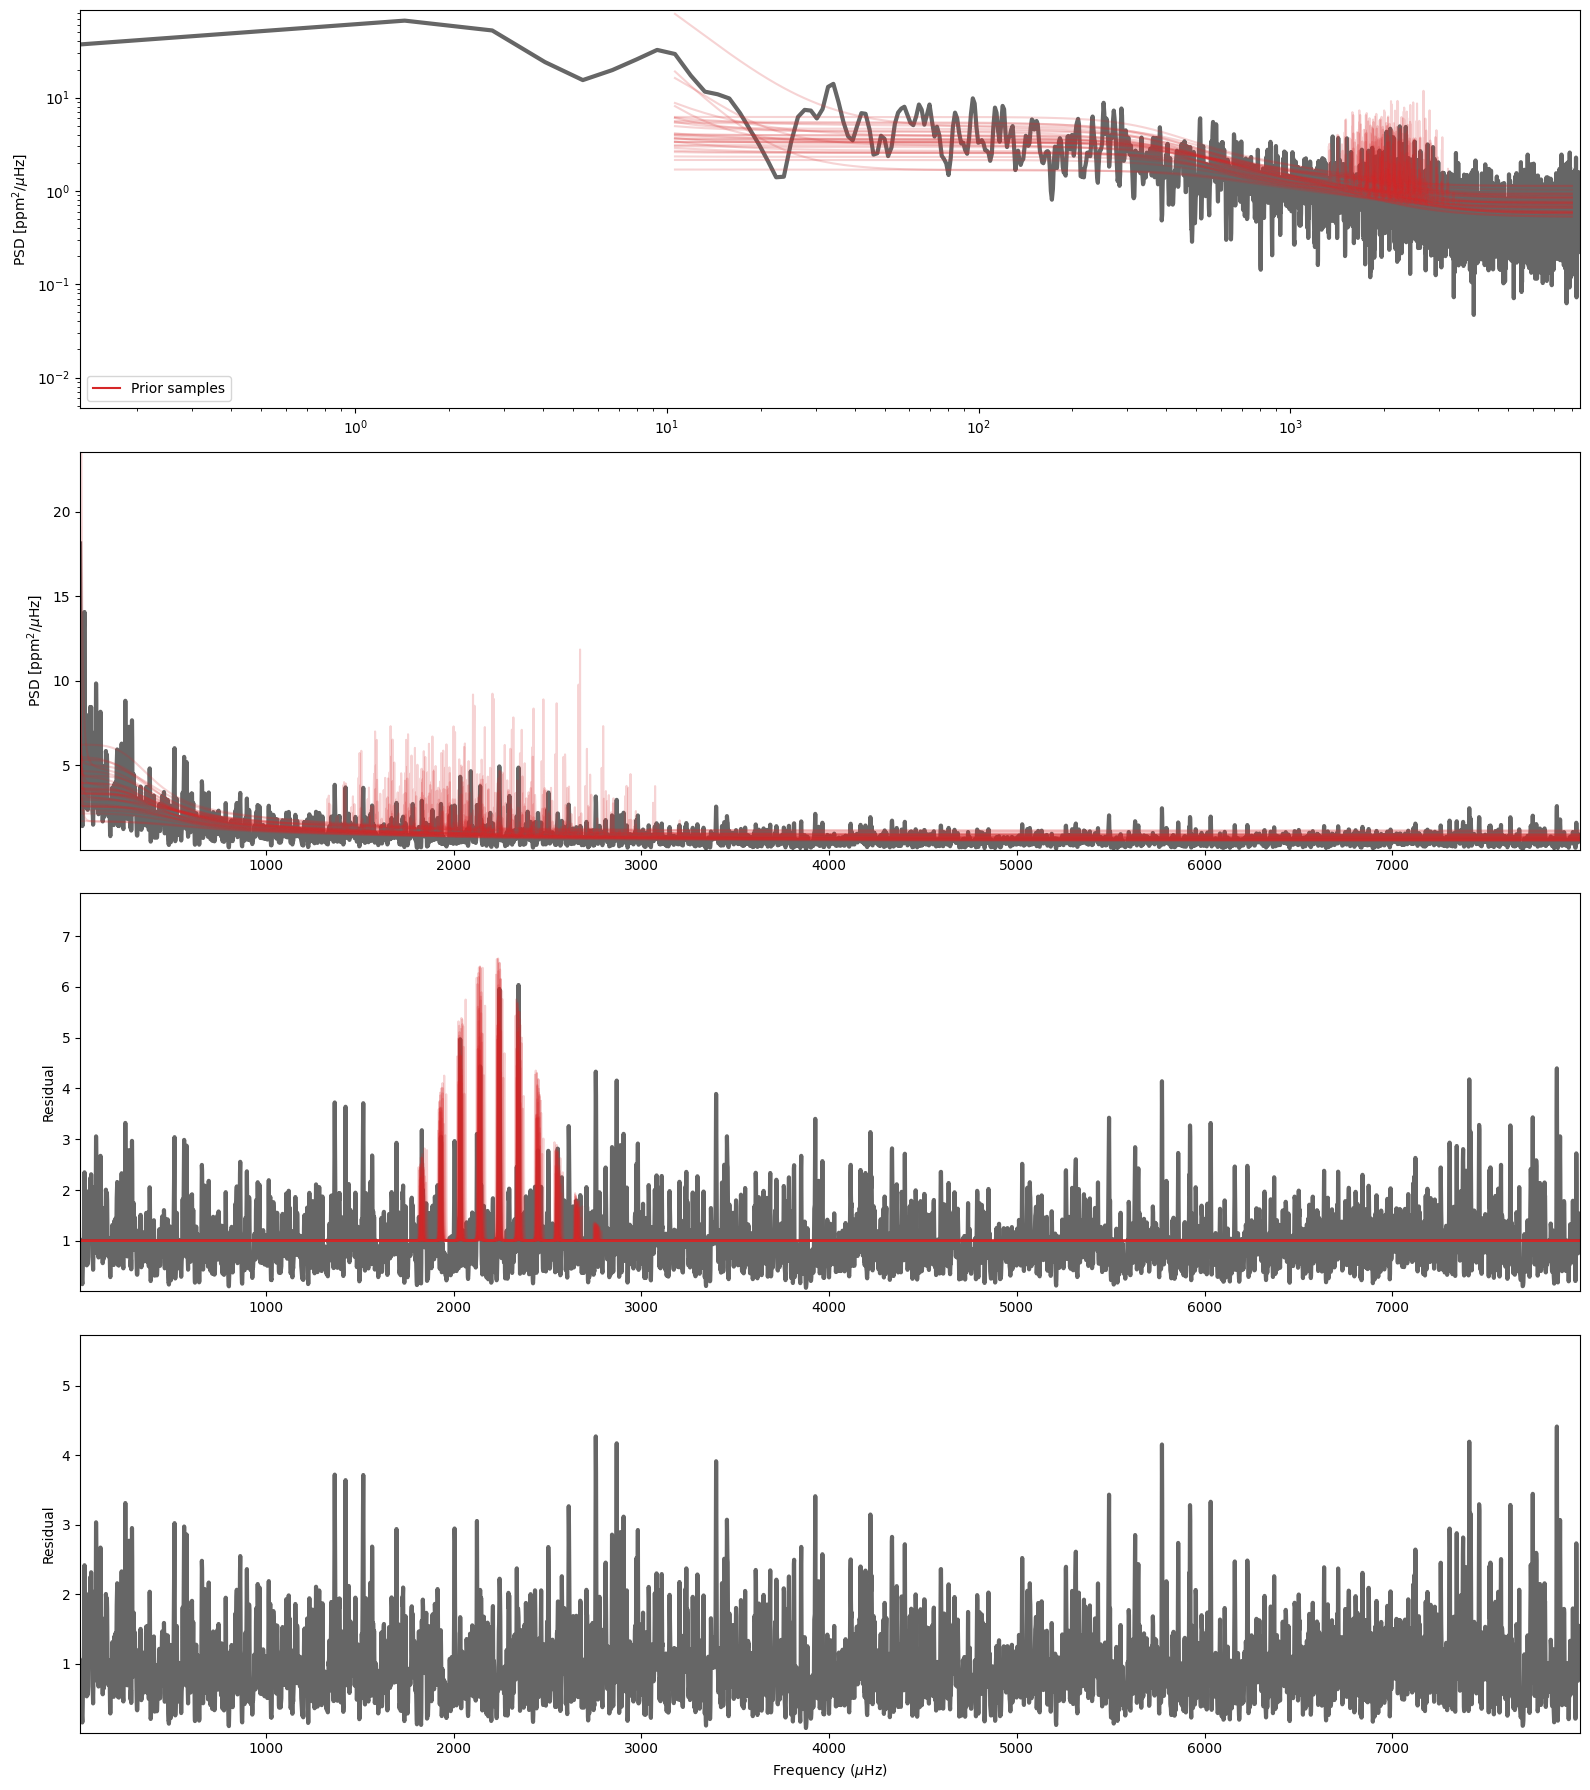

In [3]:
S.modeID.spectrum(stage='prior')

Alternatively you can plot a similar number of samples from the posterior distribution. Note that this is the default setting for the method.

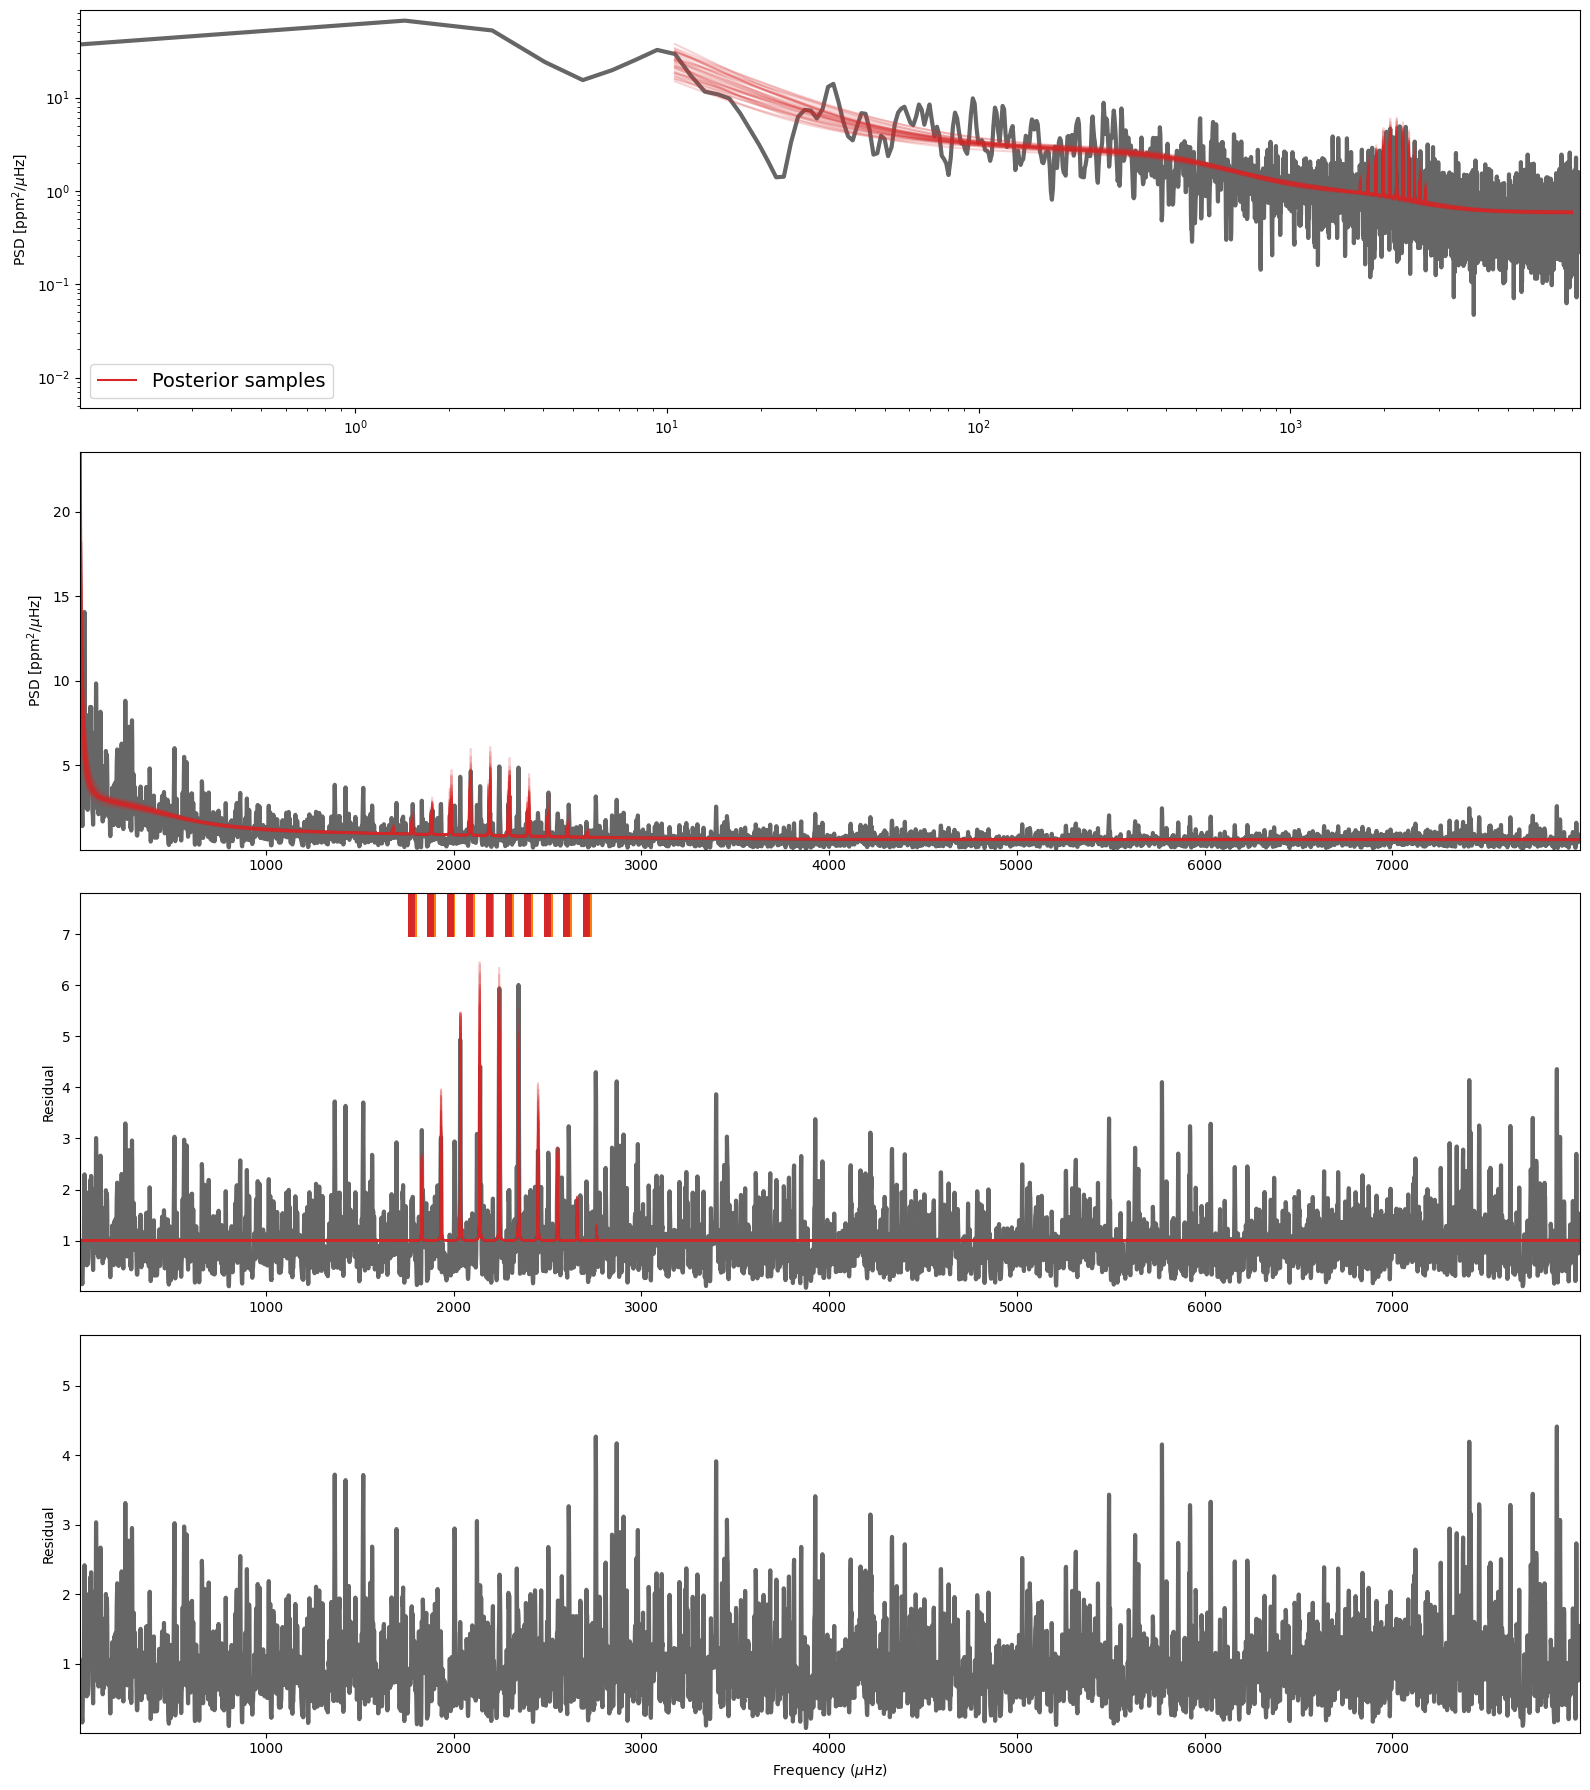

In [4]:
fig, ax = S.modeID.spectrum(stage='posterior')

### The echelle plot
Similarly you can show the echelle diagram, which in some cases is more useful to identify if `PBjam` has performed the correct mode identification.

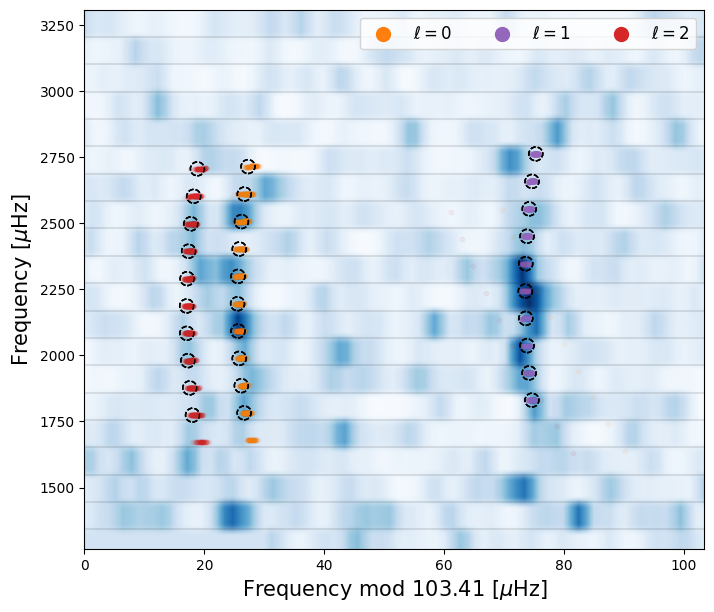

In [5]:
fig, ax = S.modeID.echelle()

### The corner plot
The corner plot methods in `PBjam` will show the samples drawn for each of the parameters in the relevant model. In the case of the `modeID` stage, which contains two models when completed, will show a corner plot of the $\ell=2,0$ model and another for the $\ell=1$ model parameters. For each of the diagonal frames showing the marginalized distributions (black), the red curve shows the prior that was used for the corresponding parameter.

In [ ]:
fig, ax = S.modeID.corner()

Since `PBjam` will on occasion perform some transformations on the model parameters like the latent parameter transformation in the `modeID` stage or from logarithmic to linear units, the `corner` method has the option to show either the raw sampled parameters or after they have been transformed to human-readable values.

Currently there is no option to show the prior density for when showing the transformed values.

In [ ]:
fig, ax = S.modeID.corner(unpacked=True)

### The reference plot

Most of the plotting methods in `PBjam` can show either the prior or posterior for a given step in the pipeline. The default is to show the posterior result, unless the relevant method has not been called of course, in which case the prior will be shown. 

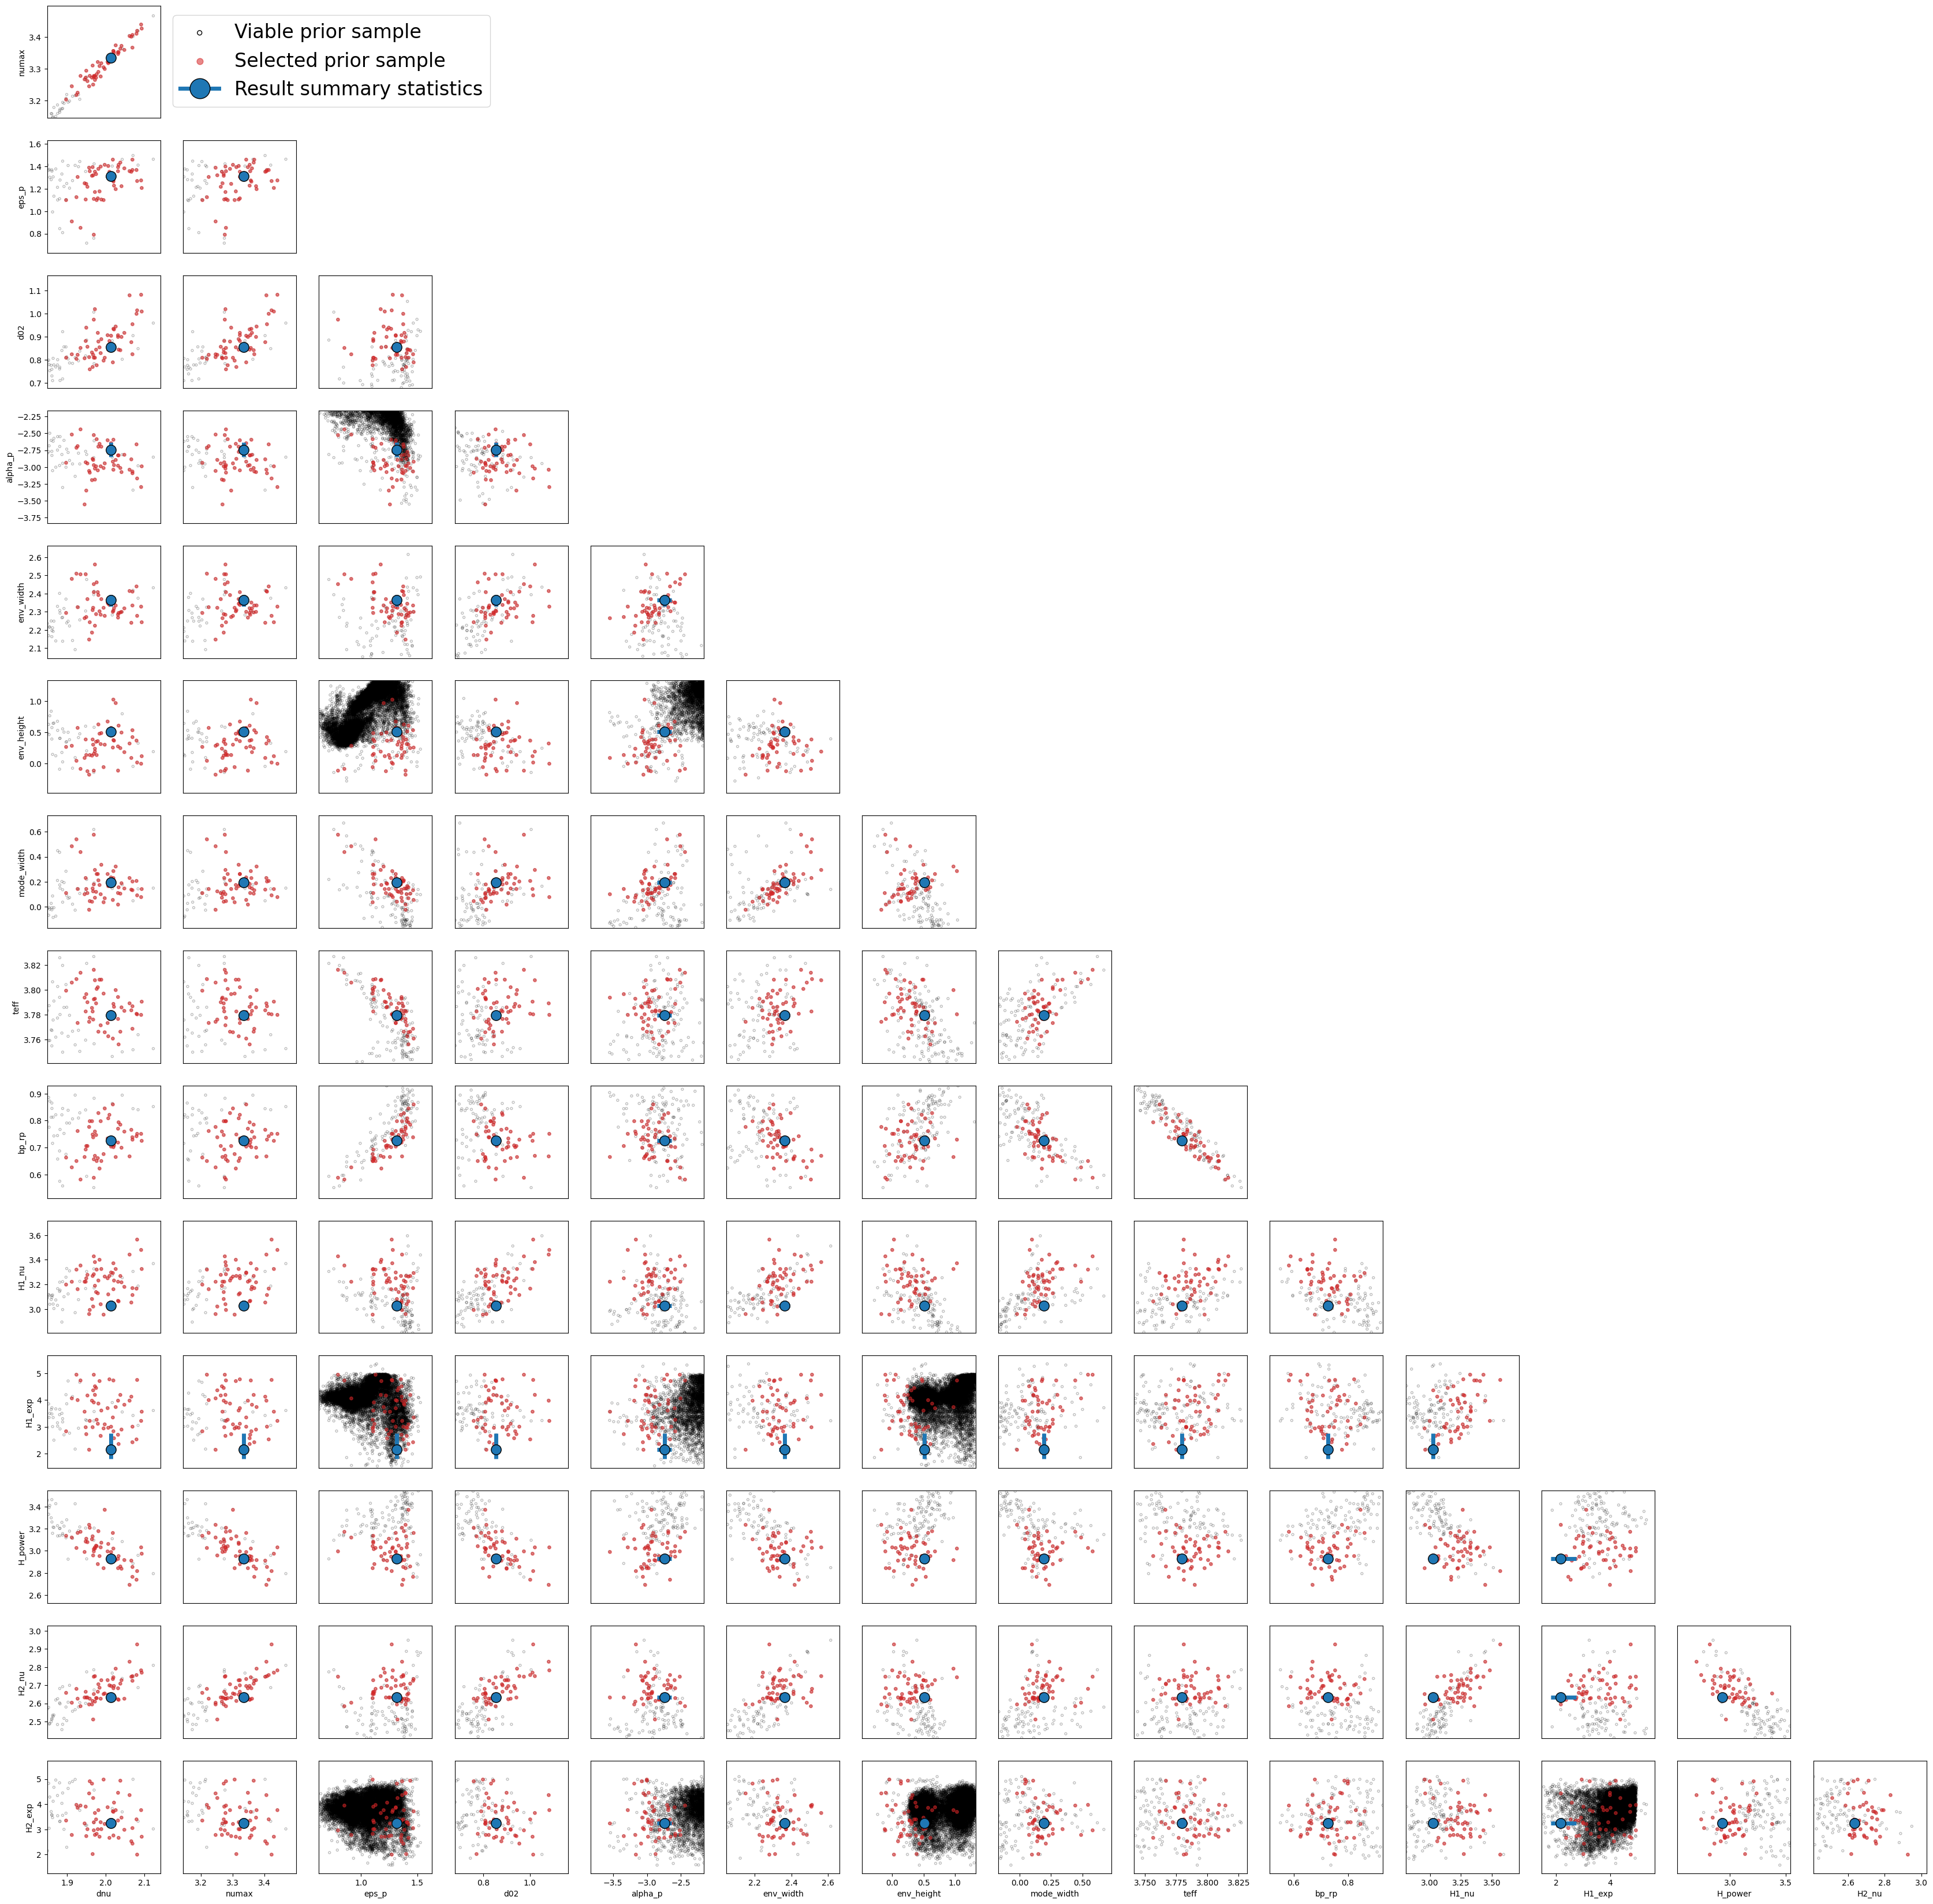

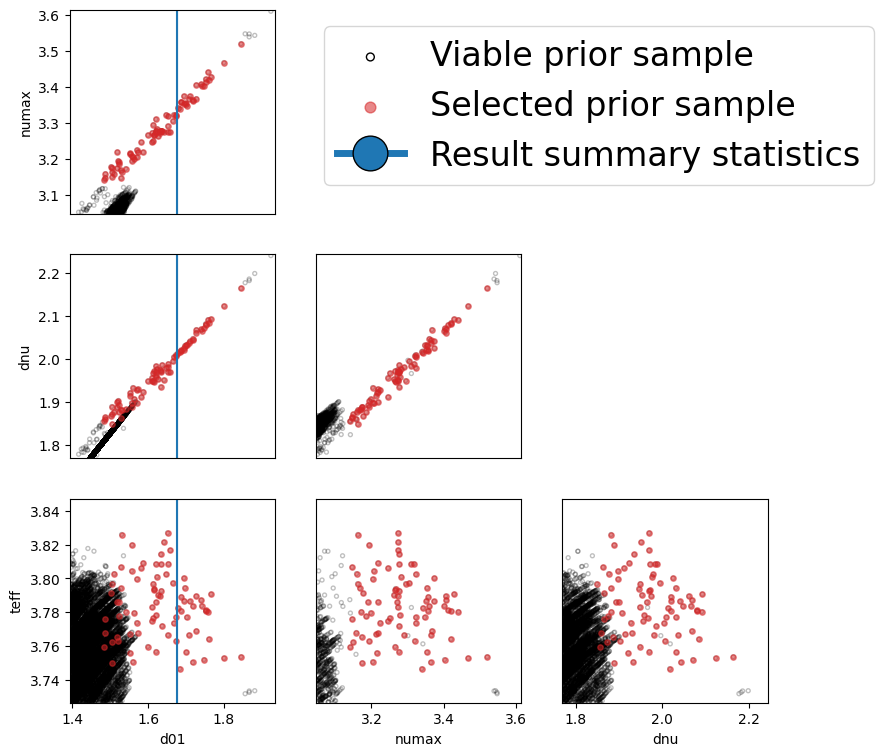

In [8]:
fig, ax = S.modeID.reference()

If you prefer to plot the models on your own, you can draw samples and then plot the resulting models by doing the following:

In [ ]:
import matplotlib.pyplot as plt

Nsamples = 10

module = S.modeID.l20model 

fig, ax = plt.subplots()

for k in range(Nsamples):
    
    sample = module.samples[k, :]

    unpacked = module.unpackParams(sample)

    mod = module.model(unpacked)

    ax.plot(module.f, mod, alpha=0.2, color='C3')